In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression


In [3]:
x , y = make_regression(n_samples = 4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

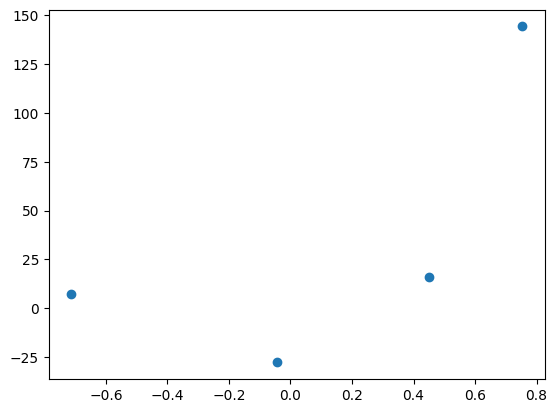

In [4]:
plt.scatter(x,y)


to get the beta and intercept

In [5]:
#with OLS
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [6]:
model.coef_


array([78.35063668])

In [7]:
model.intercept_

np.float64(26.15963284313262)

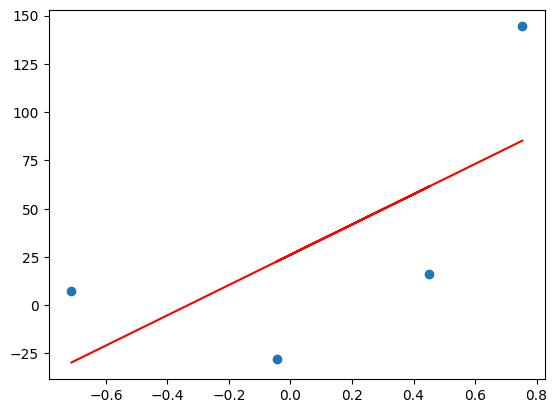

In [8]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red')

In [9]:
#keeping slope constant m = 78.35

y_pred = ((78.35*x)+0).reshape(4)

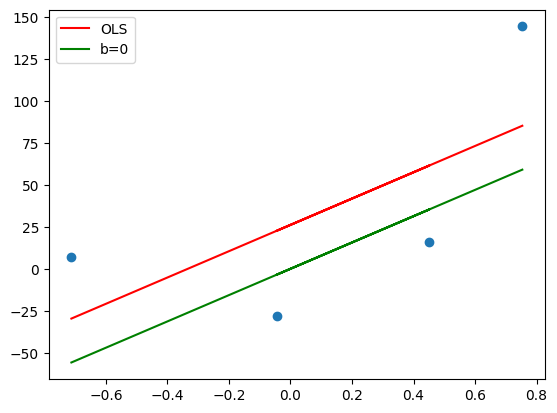

In [10]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red', label='OLS')
plt.plot(x,y_pred,color='green', label='b=0')
plt.legend()
plt.show()

In [11]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y- m*x.ravel()-b)
loss_slope

np.float64(-209.27763408209216)

In [12]:
lr = 0.1

step_size = loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [13]:
#new intercept
b = b-step_size
b

np.float64(20.927763408209216)

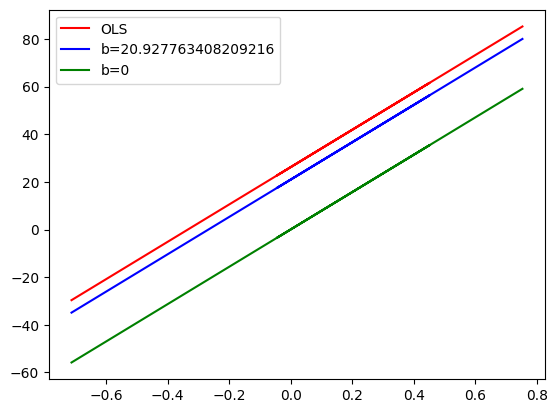

In [14]:
y_pred1 = ((78.35*x)+b).reshape(4)
plt.plot(x,model.predict(x),color='red' , label = 'OLS')

plt.plot(x, y_pred1, color = 'blue' , label = 'b={}'.format(b))
plt.plot(x,y_pred, color = 'green' , label = 'b=0')
plt.legend()
plt.show()

In [15]:
# iteration 2

loss_slope = -2 * np.sum(y- m*x.ravel()-b)
loss_slope

np.float64(-41.85552681641843)

In [16]:
step_size = loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [17]:
b = b-step_size
b

np.float64(25.11331608985106)

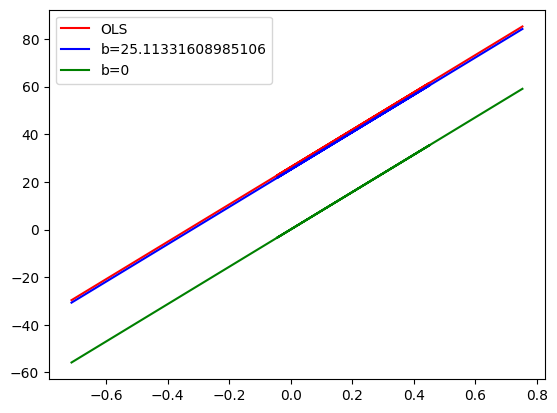

In [18]:
y_pred1 = ((78.35*x)+b).reshape(4)
plt.plot(x,model.predict(x),color='red' , label = 'OLS')

plt.plot(x, y_pred1, color = 'blue' , label = 'b={}'.format(b))
plt.plot(x,y_pred, color = 'green' , label = 'b=0')
plt.legend()
plt.show()

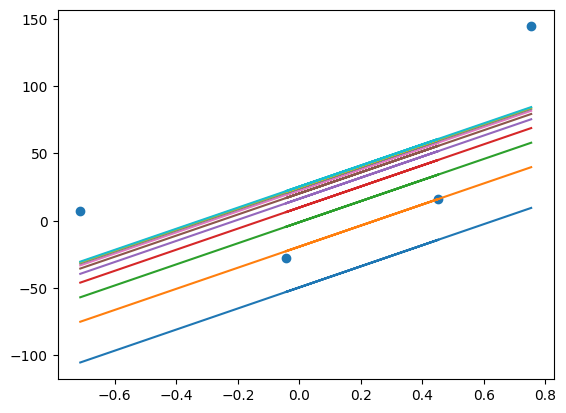

In [19]:
#doing in LOOP

b= -100
m= 78.35
lr = 0.05

epochs = 10

for i in range(epochs):
  loss_slope = -2*np.sum(y-m*x.ravel()-b)
  step_size = loss_slope*lr
  b = b-step_size

  y_pred = m*x+b

  plt.plot(x,y_pred)

plt.scatter(x,y)

# Class for gradient descent

In [20]:
x , y = make_regression(n_samples = 100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=42)

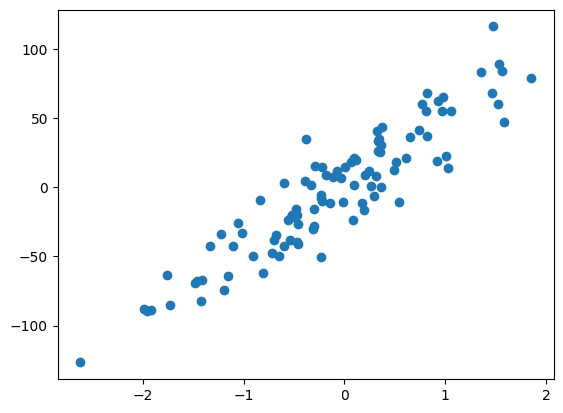

In [21]:
plt.scatter(x,y)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [23]:
y_pred = model.predict(x)

In [24]:
model.coef_

array([47.13323967])

In [25]:
model.intercept_

np.float64(2.3302306410539453)

In [26]:
 # making class for GD

class GDRegressor:
  def __init__(self, learning_rate, epochs):
    self.m = 47.13
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self, x , y):
    #b calculation
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y-self.m*x.ravel()-self.b)
      self.b = self.b - (self.lr*loss_slope)
      print(loss_slope, self.b)
    print(self.b)

In [27]:
gd = GDRegressor(0.001,100)

In [28]:
gd.fit(x,y)

-24465.97884252903 -95.53402115747096
-19572.78307402322 -75.96123808344774
-15658.226459218578 -60.30301162422916
-12526.581167374861 -47.7764304568543
-10021.264933899889 -37.755165522954414
-8017.011947119913 -29.738153575834502
-6413.60955769593 -23.324544018138575
-5130.887646156745 -18.19365637198183
-4104.710116925396 -14.088946255056435
-3283.7680935403173 -10.805178161516118
-2627.014474832253 -8.178163686683865
-2101.611579865803 -6.0765521068180615
-1681.2892638926426 -4.395262842925419
-1345.0314111141138 -3.050231431811305
-1076.0251288912907 -1.9742063029200143
-860.8201031130328 -1.1133861998069814
-688.6560824904262 -0.4247301173165552
-550.9248659923411 0.12619474867578595
-440.7398927938728 0.5669346414696588
-352.59191423509833 0.9195265557047572
-282.0735313880786 1.2016000870928358
-225.65882511046289 1.4272589122032988
-180.52706008837004 1.6077859722916688
-144.42164807069614 1.7522076203623649
-115.53731845655687 1.8677449388189218
-92.42985476524547 1.960174793

# With m and b as variable, finding slope for both m and b

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
x , y = make_regression(n_samples = 100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

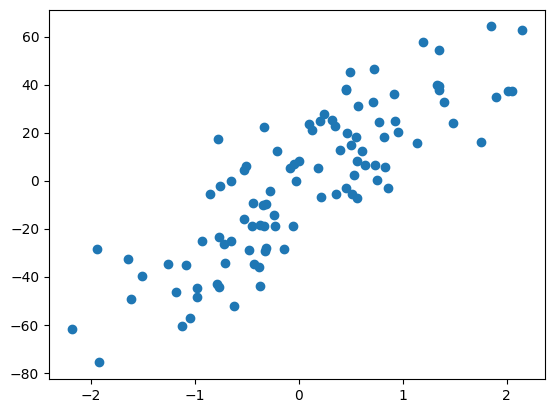

In [31]:
plt.scatter(x,y)

In [32]:
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[27.82809103]
-2.29474455867698


In [33]:


np.mean(cross_val_score(model,x,y,scoring='r2',cv=10))

np.float64(0.6375011587464419)

In [34]:
class GDRegressor:
  def __init__(self, learning_rate, epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self, x , y):
    #b and m calculation
    for i in range(self.epochs):

      loss_slope_b = -2 * np.sum(y-self.m*x.ravel()-self.b)
      loss_slope_m = -2 * np.sum((y-self.m*x.ravel()-self.b*x.ravel()))

      self.b = self.b - (self.lr*loss_slope_b)
      self.m = self.m - (self.lr*loss_slope_m)

  def predict(self,x):
      return self.m*x+self.b


      print(loss_slope_b,loss_slope_m, self.b, self.m)
      print(self.b,self.m)

In [35]:
gd = GDRegressor(0.001,100)

In [36]:
gd.fit(x,y)

In [37]:
model.predict(x)

array([-22.11921675, -14.45967366, -14.92180713,  24.22071242,
         4.32438502,  21.67112396,  -9.06604965,   2.85194818,
       -22.35878911, -14.25795969,  53.78500401,   8.75972323,
         3.48793424,  -8.76271288, -23.68416726,  10.31579458,
        15.5120049 ,   7.71035289, -47.24011599,  46.38331521,
       -24.25080297, -16.54175581, -28.12854173,  57.54630841,
        -8.06489084, -47.90758522, -11.71784416, -11.25883101,
       -15.69039214, -16.85340596,  17.79616478,  19.01909784,
        10.32476711, -37.40282965, -63.15798748, -35.28268709,
         3.75652002,  34.7254359 , -32.54893283,  13.35192538,
       -44.39433614,  -2.36122658, -10.0346972 ,  10.27833033,
        30.84031016,  23.37233236,  20.38502282, -19.57542424,
        23.13291496,  29.38289111,  38.85425675, -20.41240352,
       -12.75587946, -23.85205448,  11.6509497 ,  35.27840723,
        17.99653854,  -4.5669515 , -26.06391242,  10.66362788,
        -3.53318027,  -3.89576109,  50.37665821, -31.38

In [ ]:
gd.predict(x)

array([[-22.29241417],
       [-14.61859328],
       [-15.08158819],
       [ 24.13389512],
       [  4.20047989],
       [ 21.57955409],
       [ -9.21491526],
       [  2.72529836],
       [-22.5324331 ],
       [-14.4165033 ],
       [ 53.75329614],
       [  8.64408582],
       [  3.36246993],
       [ -8.91101306],
       [-23.86028183],
       [ 10.20305777],
       [ 15.4089541 ],
       [  7.59275939],
       [-47.46014011],
       [ 46.3378102 ],
       [-24.42797378],
       [-16.70455654],
       [-28.31294086],
       [ 57.52161181],
       [ -8.21189024],
       [-48.12885354],
       [-11.87165286],
       [-11.41178409],
       [-15.85160588],
       [-17.01678762],
       [ 17.69737178],
       [ 18.92258445],
       [ 10.21204702],
       [-37.60451655],
       [-63.40768338],
       [-35.48042193],
       [  3.63155636],
       [ 34.65819996],
       [-32.74157181],
       [ 13.24484808],
       [-44.60905558],
       [ -2.49759404],
       [-10.18536843],
       [ 10